In [19]:

import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import random
import seaborn as sns
import csv 
import warnings

# Penetración de Internet fijo (accesos por cada 100 hogares)

In [2]:
df = pd.read_csv("..\Datasets\Penetración de Internet fijo (accesos por cada 100 hogares).csv")

In [3]:
df


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


* Este DataFrame parece contener información sobre los accesos a Internet en diferentes localidades de una provincia durante un período de tiempo determinado.

In [4]:
df["Provincia" ].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

* controlamos las provincias, utilizando .unique para no ver repetidas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


### Utilizando .info en el fataframe de nuestros datos nos muestra informacion importante, algunos puntos a destacar:

* Año: Esta columna parece contener el año en el que se registró cada observación. Todos los valores son enteros (int64), 
lo que sugiere que cada observación corresponde a un año específico.

* Trimestre: Esta columna parece contener el trimestre del año en el que se registró cada observación. Al igual que la columna 'Año',
todos los valores son enteros.

* Provincia: Esta columna parece contener el nombre de la provincia donde se registró cada observación. Los valores son de tipo 'object',
lo que indica que son cadenas de texto.

* Accesos por cada 100 hogares: Esta columna parece contener información sobre la cantidad de accesos a Internet por cada 100 hogares. Los valores son de tipo 'object',
lo que sugiere que son cadenas de texto. Sin embargo, dado que esta columna parece contener datos cuantitativos, sería más apropiado convertir estos valores a un tipo de dato numérico, como float64.

* Las columnas: [Unnamed: 4], [Unnamed: 5] y [Unnamed: 6] parecen ser columnas sin nombre que contienen valores float64. estas columnas no contienen información relevante para el análisis, considero eliminarlas.

En resumen, este DataFrame parece contener información útil para el análisis de los accesos a Internet en diferentes localidades de una provincia a lo largo del tiempo. Sin embargo, hay algunas columnas que podrían beneficiarse de una limpieza o transformación de datos, como la columna 'Accesos por cada 100 hogares' que contiene datos cuantitativos almacenados como texto.

In [6]:
df['Provincia'] = df['Provincia'].astype('category')

* Es una buena práctica convertir la columna 'Provincia' a tipo category si no vas a realizar operaciones matemáticas en ella y si quieres ahorrar memoria. Los datos categóricos a menudo tienen un número limitado de valores únicos y el tipo category puede ayudar a reducir la memoria utilizada. 

In [7]:
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

* Convierto la columna ["Accesos por cada 100 hogares"] a float y reemplazo las comas por puntos, Esto se debe a que Python interpreta el punto como el separador decimal, mientras que la coma se usa para separar los miles.

In [8]:
df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)

* Elimino las tres columns indefinidas, las considero irelevantes

In [9]:
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [10]:
df["Accesos por cada 100 hogares"].describe()

count    864.000000
mean      49.620301
std       23.319150
min        9.350000
25%       32.220000
50%       46.390000
75%       62.442500
max      124.060000
Name: Accesos por cada 100 hogares, dtype: float64

## Promedio de accesos por cada 100 hogares para cada provincia

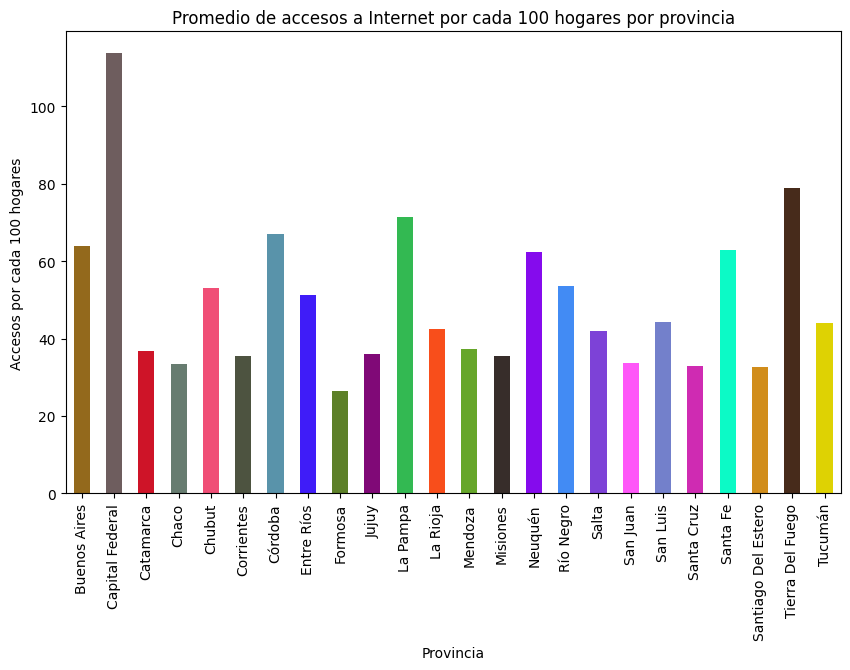

In [11]:
# Calcular el promedio de accesos por cada 100 hogares para cada provincia
promedios = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Generar una lista de colores
colores = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
           for i in range(len(promedios))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
promedios.plot(kind='bar', color=colores)
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Promedio de accesos a Internet por cada 100 hogares por provincia')
plt.show()

* El objetivo de esta tarea es calcular y visualizar el promedio de accesos a internet por cada 100 hogares en cada provincia.
 
* El eje x del plot representa el año, y el eje y representa el promedio de accesos. De esta manera, se puede observar la evolución del promedio de accesos a internet en cada provincia a lo largo del tiempo.

### Trimestres con menos de 10 hogares por cada 100

In [12]:
mask = df['Accesos por cada 100 hogares']<10 # Mascara para ver trimestres con menos de 10 hogares por cada 100
df[mask]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
546,2017,2,San Luis,9.51
570,2017,1,San Luis,9.55
594,2016,4,San Luis,9.64
618,2016,3,San Luis,9.63
642,2016,2,San Luis,9.60
666,2016,1,San Luis,9.59
690,2015,4,San Luis,9.71
714,2015,3,San Luis,9.71
738,2015,2,San Luis,9.71
762,2015,1,San Luis,9.72


### Trimestres con mayor de 100 hogares por cada 100

In [13]:
mask = df['Accesos por cada 100 hogares']>100 # Mascara para ver trimestres con menos de 10 hogares por cada 100
df[mask]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,4,Capital Federal,122.73
22,2022,4,Tierra Del Fuego,101.44
25,2022,3,Capital Federal,122.28
49,2022,2,Capital Federal,121.31
73,2022,1,Capital Federal,111.80
97,2021,4,Capital Federal,111.27
121,2021,3,Capital Federal,111.27
145,2021,2,Capital Federal,110.14
169,2021,1,Capital Federal,108.42
193,2020,4,Capital Federal,108.31


## Evolución del acceso a internet a nivel provincial por año

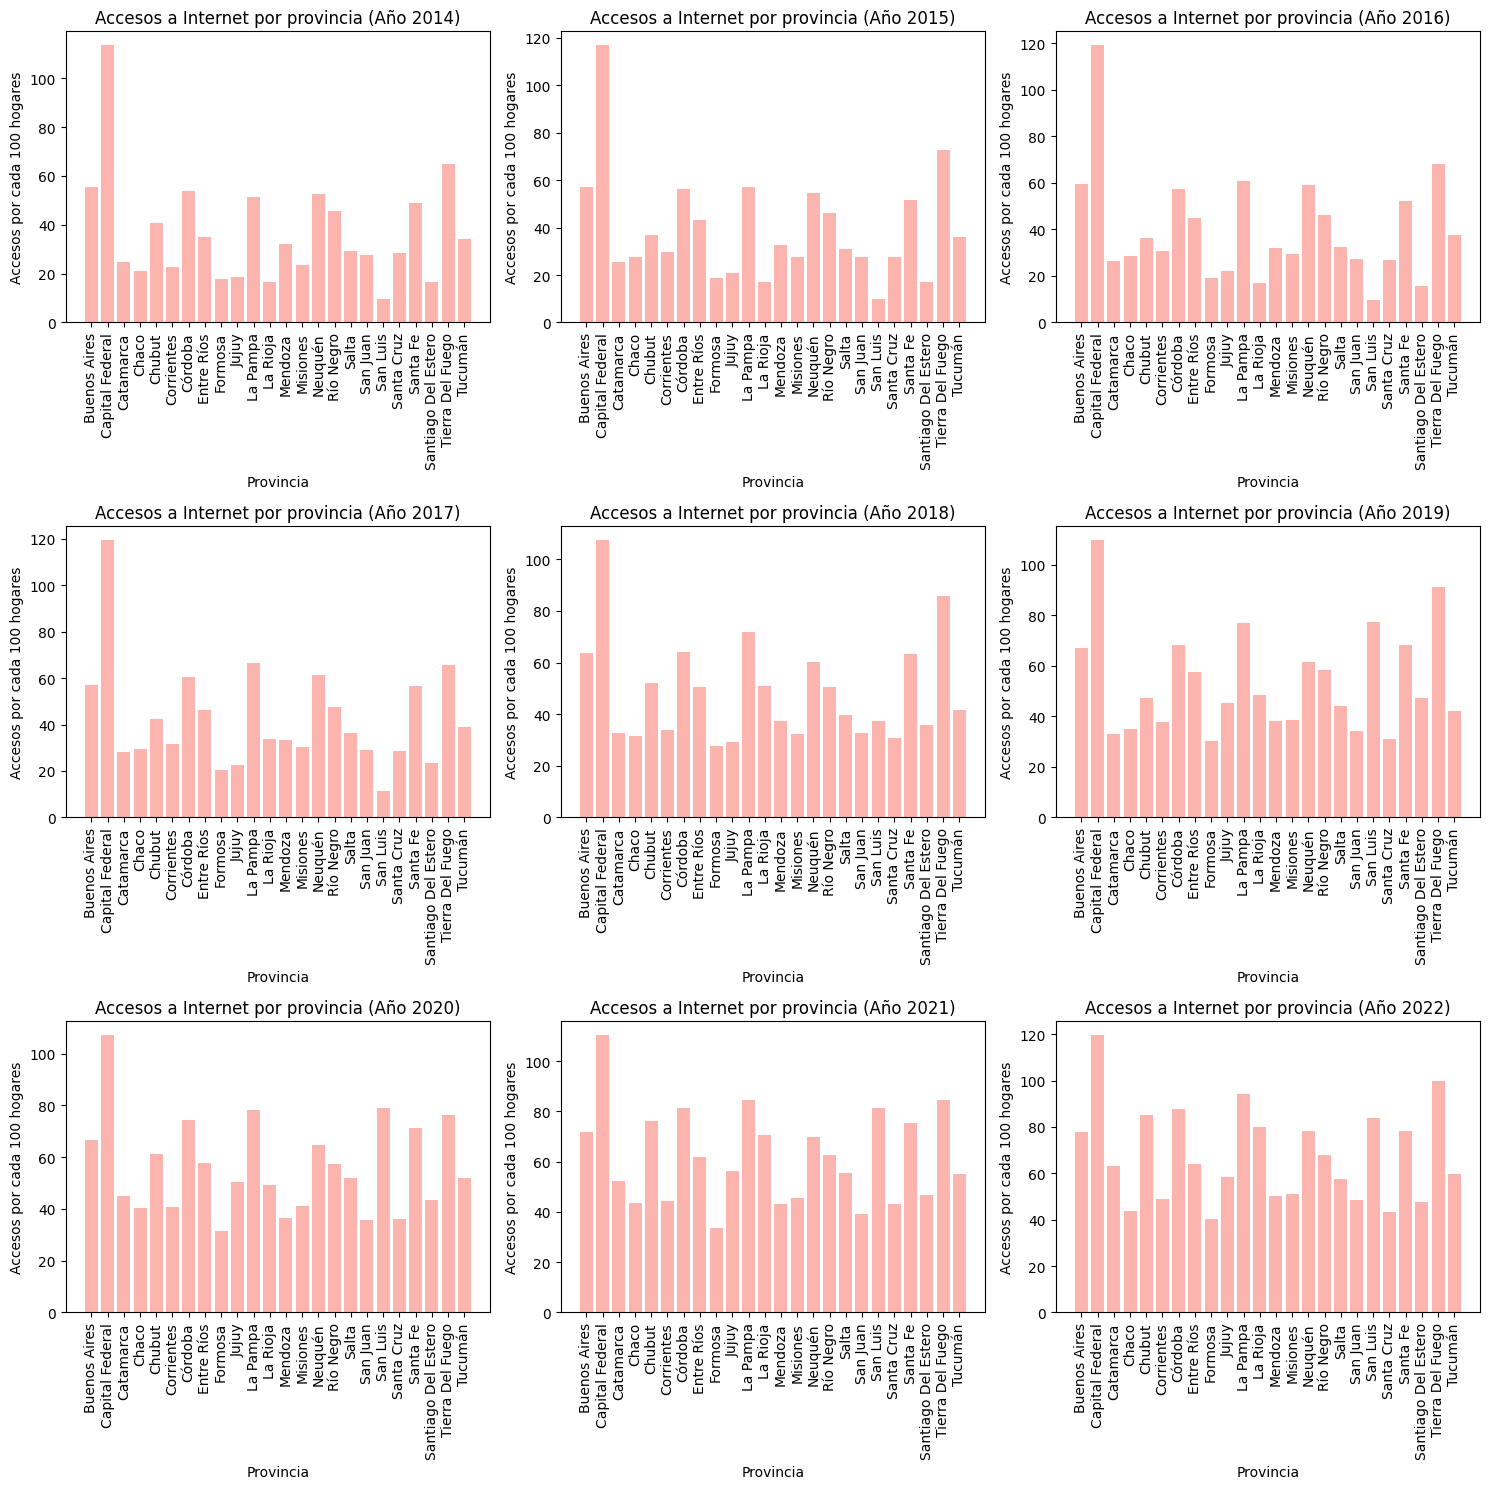

In [14]:
# Definir el color pastel para las columnas
color_pastel = sns.color_palette("Pastel1")[0]  # Elige el primer color de la paleta

# Crear un subplot para cada año
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterar sobre los años del 2020 al 2022
for año, ax in zip(range(2014, 2023), axes.flatten()):
    # Filtrar los datos para el año actual
    df_año = df[df['Año'] == año]

    # Agrupar los datos por provincia y calcular el promedio de accesos
    df_año_grouped = df_año.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(df_año_grouped.index, df_año_grouped.values, color=color_pastel)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Accesos a Internet por provincia (Año {año})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


* En este análisis, hemos creado nueve gráficos individuales, uno para cada año desde 2014 hasta 2022. Cada gráfico representa la evolución del promedio de accesos a internet por cada 100 hogares en cada provincia durante ese año en particular.

* Este enfoque nos permite examinar la evolución del acceso a internet a nivel provincial durante un período de tiempo específico. Al comparar los gráficos de diferentes años, podemos identificar tendencias y patrones, como un aumento o disminución general en el acceso a internet, o un cambio en la velocidad promedio de acceso.

* Además, al tener un gráfico para cada año, podemos realizar un seguimiento más detallado de los cambios a lo largo del tiempo. Esto puede ser útil para identificar eventos específicos que podrían haber influido en el acceso a internet, como la implementación de nuevas tecnologías o políticas gubernamentales.

* Finalmente, estos gráficos también pueden ser útiles para la comunicación de los resultados. Al presentar los datos en un formato visual fácil de entender, podemos ayudar a las personas a comprender mejor la situación del acceso a internet en cada provincia y cómo ha cambiado con el tiempo."

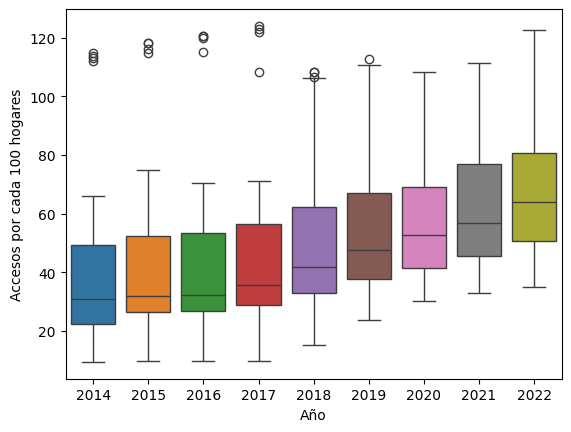

In [24]:
warnings.filterwarnings('ignore')
my_palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
sns.boxplot(x = "Año", y='Accesos por cada 100 hogares', data = df, palette=my_palette)
plt.show()



## Evolución del promedio de acceso a internet año tras año por cada provincia

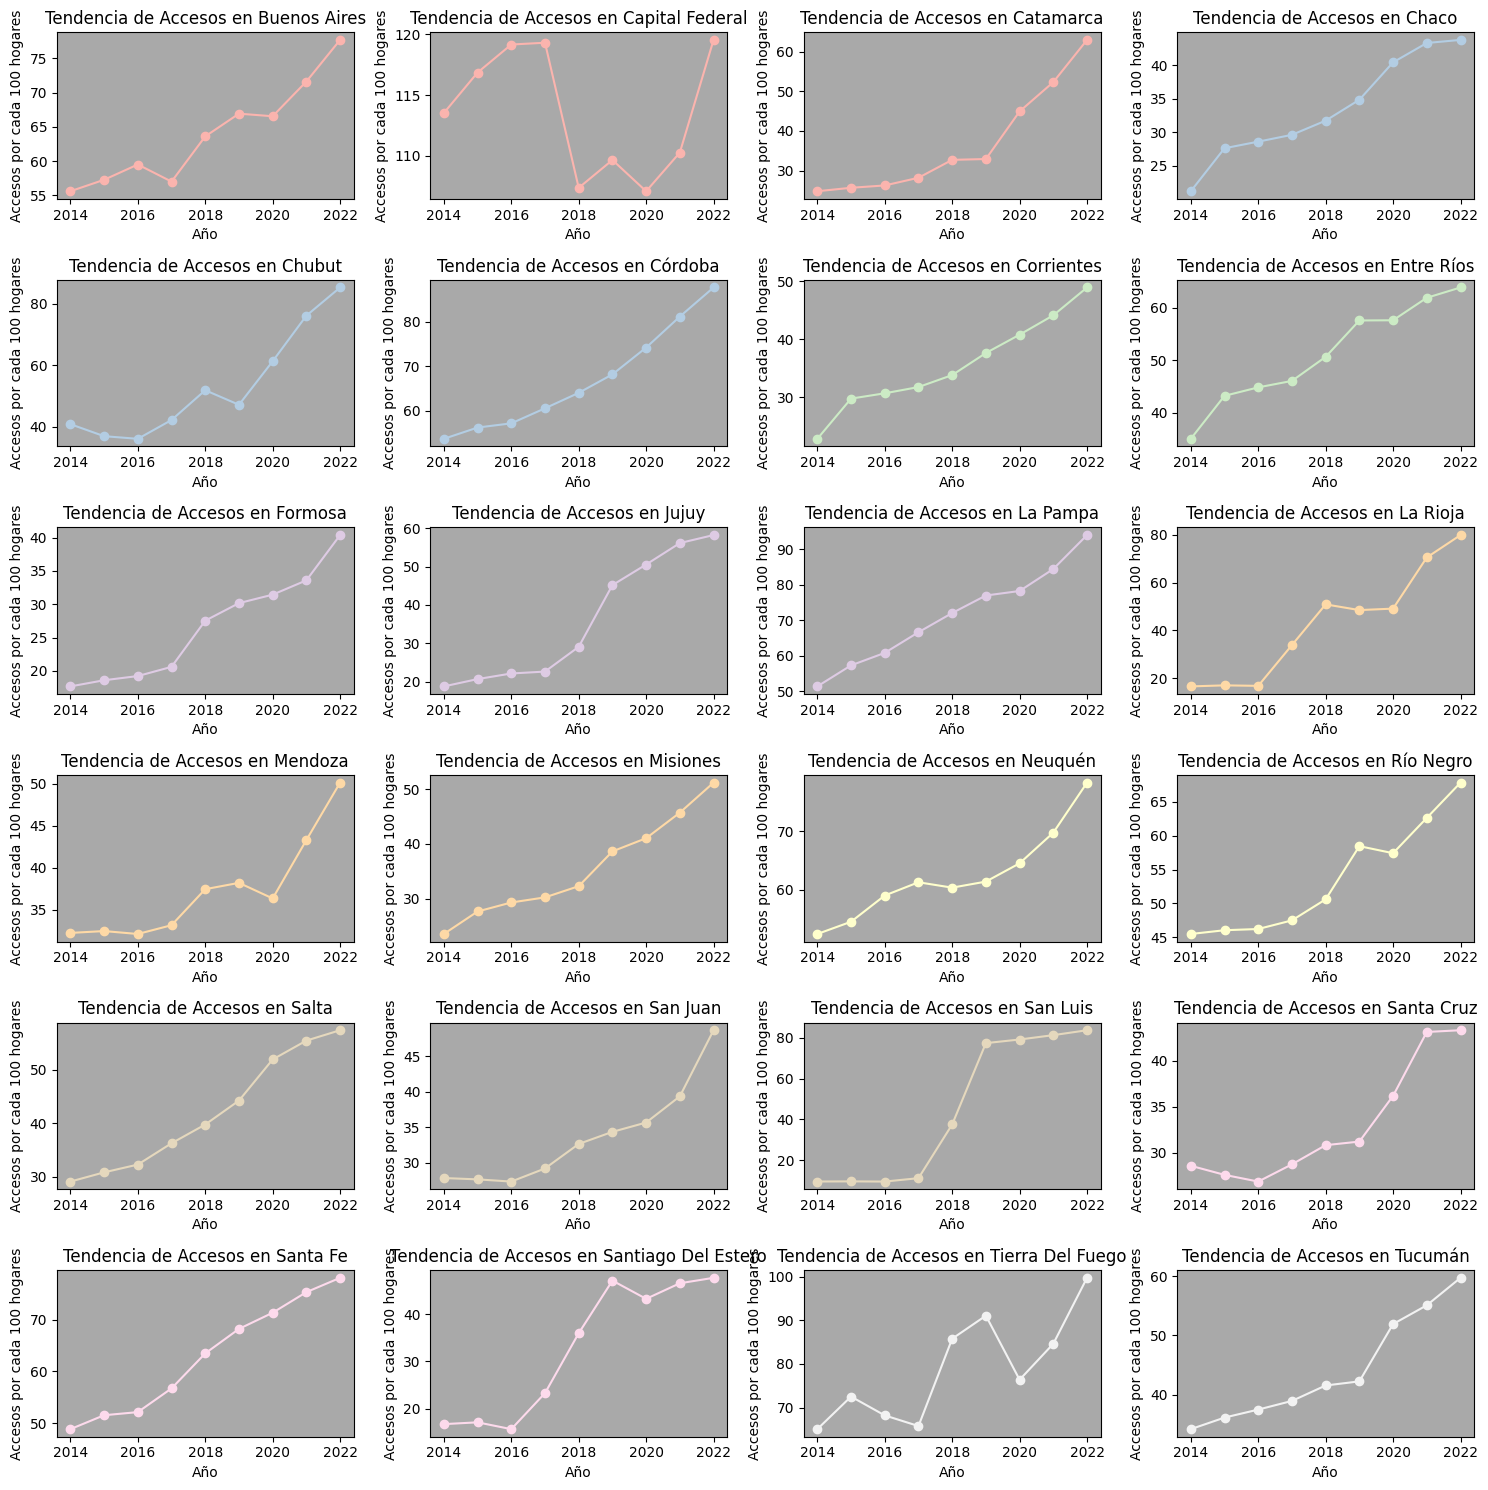

In [ ]:
# Obtén los nombres de las provincias
provincias = df['Provincia'].unique()

# Crea los subtramas
n_rows = len(provincias) // 4 + (len(provincias) % 4 > 0)
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

# Aplana los ejes para un acceso más fácil
axes = axes.flatten()

# Crea un generador de colores pastel
colormap = plt.cm.Pastel1

# Itera sobre las provincias
for i, provincia in enumerate(provincias):
 # Filtra los datos para la provincia actual
 df_provincia = df[df['Provincia'] == provincia]

 # Agrupa los datos por año y calcula los accesos promedio
 df_provincia_grouped = df_provincia.groupby('Año')['Accesos por cada 100 hogares'].mean()

 # Crea el gráfico de líneas en el subtrama correspondiente
 axes[i].plot(df_provincia_grouped.index, df_provincia_grouped.values, marker='o', color=colormap(i/len(provincias)))
 axes[i].set_xlabel('Año')
 axes[i].set_ylabel('Accesos por cada 100 hogares')
 axes[i].set_title(f'Tendencia de Accesos en {provincia}')
 axes[i].set_facecolor('darkgray')


# Ajusta el espaciado entre los subtramas
plt.tight_layout()

# Muestra el gráfico
plt.show()


### Este análisis tiene como objetivo visualizar la evolución del promedio de acceso a internet año tras año por cada provincia.
1- Cada provincia se representa con un gráfico de línea diferente, donde el eje x representa el año y el eje y representa el promedio de accesos por cada 100 hogares.

2- El color de cada línea corresponde a una paleta de colores pastel, lo que facilita la distinción entre las diferentes provincias. Además, se ha establecido un fondo de color gris claro para cada subplot, lo que mejora la legibilidad de los gráficos.

3- Al observar estos gráficos, podemos obtener una idea clara de cómo ha cambiado el promedio de accesos a internet en cada provincia a lo largo del tiempo. Esto puede ayudarnos a identificar tendencias, como un aumento o disminución general en el acceso a internet, o un cambio en la velocidad promedio de acceso.

* La penetración de Internet se refiere al porcentaje de la población de una región que tiene acceso a Internet. En este contexto, las provincias con una penetración por debajo del 60% representan oportunidades para la expansión de Internet. Estas provincias podrían beneficiarse de inversiones en infraestructura de Internet, políticas de inclusión digital y programas de capacitación digital.

* Es importante destacar que, aunque la penetración de Internet es un indicador clave de desarrollo digital, no es el único factor a considerar. Otros indicadores, como la velocidad de Internet y la accesibilidad a Internet, también juegan un papel crucial en el desarrollo digital de una región.

### Realizamos un agrupamiento de los datos por provincia, con el objetivo de calcular el promedio de penetración de internet. Posteriormente, aplicamos un filtro para identificar las provincias cuyo promedio de penetración es inferior al 60%."

## Importante !!!

In [ ]:
oportunidad = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
oportunidad[oportunidad < 60]

Provincia
Catamarca              36.737500
Chaco                  33.472778
Chubut                 53.114444
Corrientes             35.597778
Entre Ríos             51.164444
Formosa                26.581389
Jujuy                  35.920000
La Rioja               42.564444
Mendoza                37.265000
Misiones               35.512222
Río Negro              53.567500
Salta                  41.886667
San Juan               33.618333
San Luis               44.339722
Santa Cruz             32.937778
Santiago Del Estero    32.591944
Tucumán                44.124167
Name: Accesos por cada 100 hogares, dtype: float64

* Analizando esta informacion, el promedio de penetración de internet por provincia puede ser un indicador clave de rendimiento - - (KPI) - - para evaluar la oportunidad de mejora del servicio.  Las provincias con una penetración de internet por debajo del 60% pueden ser consideradas como oportunidades para mejorar el servicio, ya que estas regiones aún tienen margen para aumentar su penetración de internet.

    Mejorar la penetración de internet en estas provincias puede tener varias ventajas. Por un lado, puede ayudar a reducir la brecha digital, mejorando el acceso a la información y las oportunidades para la educación y el empleo. Por otro lado, puede beneficiar a las empresas que buscan expandirse a nuevas regiones, ya que una mayor penetración de internet puede indicar una mayor demanda de servicios digitales.

    Además, las provincias con una penetración de internet por debajo del 60% pueden presentar oportunidades para la inversión en infraestructura de internet. Por ejemplo, podrían ser candidatas para recibir fondos de inversión para mejorar la infraestructura de internet, o podrían tener mayores oportunidades para recibir subvenciones o programas de apoyo para mejorar el acceso a internet.

---- Guardo mi dataframe limpio en un archivo csv para usarlo en power bi.

In [ ]:
df.to_csv("penetracion_de_internet_fijo_por_cada_100_hogares.csv", index=False)

# 2 set - Penetración por hogares nacional de Internet fijo

In [ ]:
df_penetracion_nacional_inrternet_fijo = pd.read_csv("..\Datasets\Penetración por hogares nacional de Internet fijo.csv")


In [ ]:
df_penetracion_nacional_inrternet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


* Analizando la informacion que nos brinda, parece representar los datos de penetración de Internet en Argentina durante varios periodos de tiempo. Las columnas 'Año', 'Trimestre' y 'Periodo' proporcionan información sobre el tiempo, mientras que las columnas 'Accesos por cada 100 hogares' y 'Accesos por cada 100 hab' representan la cantidad de accesos a Internet por cada 100 hogares y por cada 100 habitantes, respectivamente.

In [ ]:
df_penetracion_nacional_inrternet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


* vemos conversiones importantes a considerar

In [ ]:
# Lista de columnas a procesar
columnas = [col for col in df_penetracion_nacional_inrternet_fijo.columns if col.startswith('Accesos por cada')]

# Aplicar la operación a cada columna
for col in columnas:
    df_penetracion_nacional_inrternet_fijo[col] = df_penetracion_nacional_inrternet_fijo[col].str.replace(',', '.').astype(float)

pd.set_option('display.float_format', '{:.2f}'.format)


1- Conversión de tipos de datos: Las columnas 'Accesos por cada 100 hogares' y 'Accesos por cada 100 hab' están actualmente almacenadas como objetos, lo que significa que son tratadas como cadenas de texto. Sin embargo, estos datos deberían ser tratados como números flotantes.

2- Reemplazo de caracteres: Los valores en las columnas 'Accesos por cada 100 hogares' y 'Accesos por cada 100 hab' utilizan una coma para separar las decimales. Para realizar cálculos con estos datos, necesitamos reemplazar la coma por un punto. lo hacemos con el método str.replace(',', '.').


In [ ]:
df_penetracion_nacional_inrternet_fijo[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].describe()

,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.00,36.00
mean,60.75,18.76
std,8.51,2.78
min,49.55,15.05
25%,53.16,16.31
50%,59.92,18.48
75%,66.64,20.70
max,77.21,24.15


- El "acceso por cada 100 hogares" se refiere a cuántos hogares de cada 100 tienen acceso a Internet. Esto nos da una idea de la infraestructura de Internet a nivel de hogares.

- Por otro lado, el "acceso por cada 100 habitantes" se refiere a cuántos individuos de cada 100 tienen acceso a Internet. Esto nos da una idea de la cantidad de personas que pueden acceder a Internet.



### Accesos por cada 100 hogares y por cada 100 hab a partir de 2020

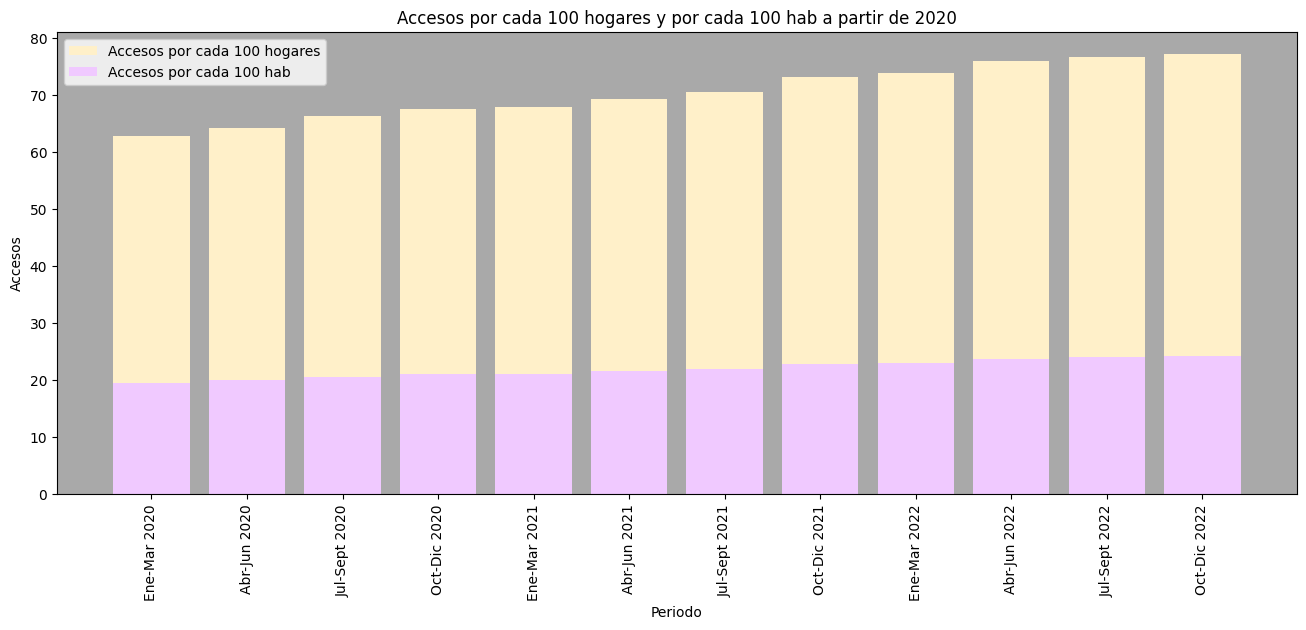

In [ ]:
# Filtrado y ordenación en una sola línea
df_filtrado = df_penetracion_nacional_inrternet_fijo[df_penetracion_nacional_inrternet_fijo['Año'] >= 2020].sort_values(['Año', 'Trimestre'])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6)) # Puedes ajustar el tamaño de la figura según lo necesites

# Crear el gráfico de barras con colores específicos
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', color='#fff0c9')
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', color='#f0c9ff')

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos')
ax.set_title('Accesos por cada 100 hogares y por cada 100 hab a partir de 2020')
ax.set_facecolor('darkgray')

plt.xticks(rotation=90)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


* Es importante notar que estas dos métricas pueden dar resultados diferentes debido a que los hogares suelen estar conformados por más de una persona. Es decir, un hogar con acceso a Internet podría tener varias personas utilizando esa conexión. Por eso, es posible que el acceso a Internet por cada 100 hogares sea mayor que el acceso a Internet por cada 100 habitantes.

    En resumen, la visualización está comparando la penetración de Internet a nivel de hogares y a nivel de individuos. El hecho de que el acceso en razón a los habitantes sea menor podría explicarse por el uso compartido de las conexiones a Internet en los hogares 

### Accesos por cada 100 hogares y por cada 100 hab a partir de 2017 hasta 2019


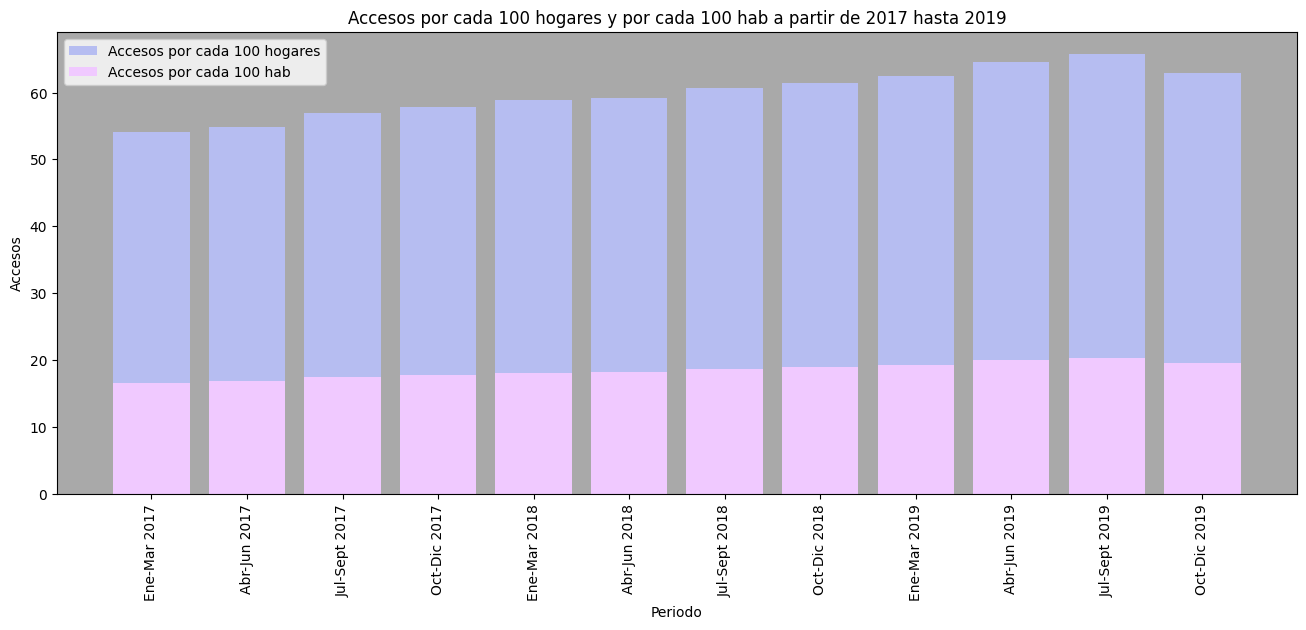

In [ ]:
# Filtrado y ordenación en una sola línea
df_filtrado = df_penetracion_nacional_inrternet_fijo[(df_penetracion_nacional_inrternet_fijo['Año'] >= 2017) & (df_penetracion_nacional_inrternet_fijo['Año'] <= 2019)].sort_values(['Año', 'Trimestre'])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6)) # Puedes ajustar el tamaño de la figura según lo necesites

# Crear el gráfico de barras con colores específicos
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', color='#b6bdf1')
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', color='#f0c9ff')

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos')
ax.set_title('Accesos por cada 100 hogares y por cada 100 hab a partir de 2017 hasta 2019')
ax.set_facecolor('darkgray')

plt.xticks(rotation=90)
# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

### Accesos por cada 100 hogares y por cada 100 hab a partir de 2014 hasta 2016


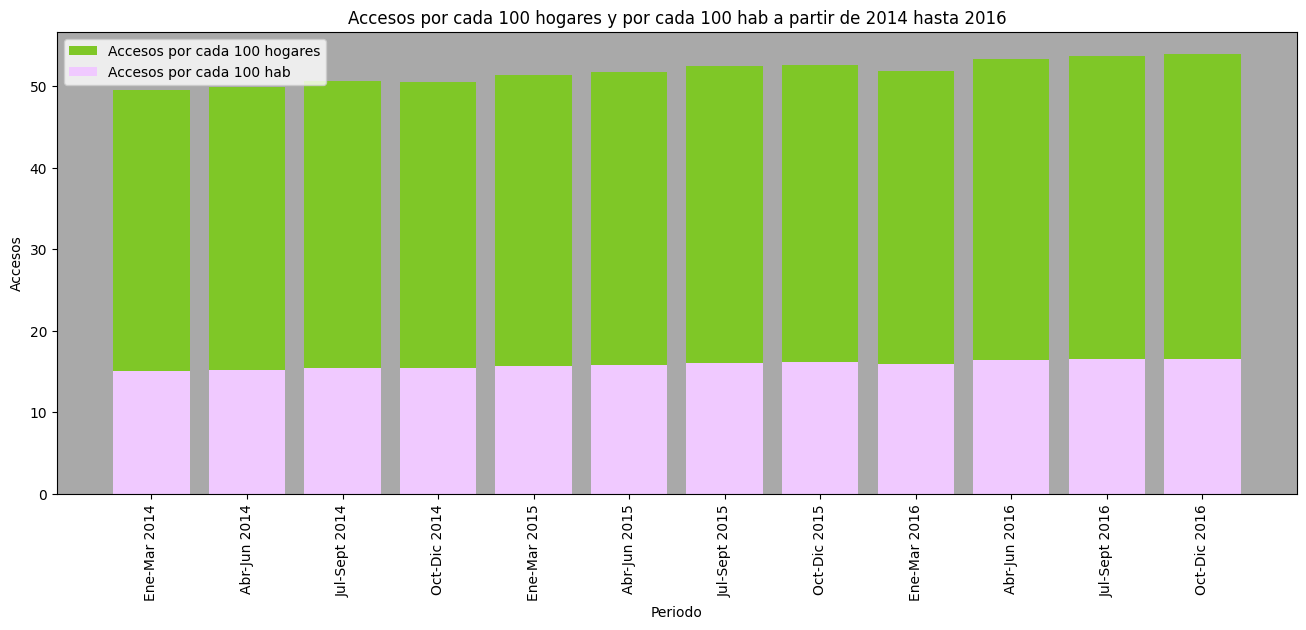

In [ ]:
# Filtrado y ordenación en una sola línea
df_filtrado = df_penetracion_nacional_inrternet_fijo[df_penetracion_nacional_inrternet_fijo['Año'] <= 2016].sort_values(['Año', 'Trimestre'])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6)) # Puedes ajustar el tamaño de la figura según lo necesites

# Crear el gráfico de barras con colores específicos
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', color='#7fc727')
ax.bar(df_filtrado['Periodo'], df_filtrado['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', color='#f0c9ff')

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos')
ax.set_title('Accesos por cada 100 hogares y por cada 100 hab a partir de 2014 hasta 2016')
ax.set_facecolor('darkgray')

plt.xticks(rotation=90)
# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

Guardo mi dataframe procesado en un csv para trabajar en Power Bi

In [ ]:

df_penetracion_nacional_inrternet_fijo.to_csv("Penetración_hogares_nacional_Internet_fijo.csv", index=False)

# 3 set - Total nacional de accesos a Internet fijo por banda ancha y banda angosta

 * * * * * * * * * * * * * * * * * 

In [ ]:
# Cargar el tercer set de datos que contiene información de el total de accesos por banda ancha fija y angosta a nivel nacional

df_total_accesos = pd.read_csv("..\Datasets\Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv")

In [ ]:
df_total_accesos.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


* Parece ser un resumen de la penetración de banda ancha fija, dial up y el total de accesos por cada 100 hogares y cada 100 habitantes en diferentes períodos de tiempo.
algunas observaciones que podriamos hacer:

    El DataFrame está ordenado por 'Año' y 'Trimestre', lo que sugiere que los datos se recopilan y presentan en un formato temporal.

    Las columnas 'Banda ancha fija', 'Dial up' y 'Total' parecen representar diferentes métodos o tipos de acceso a Internet.

    El valor en cada fila para estas columnas es el mismo, lo que sugiere que se está midiendo el mismo tipo de acceso en cada período de tiempo.
    
    La columna 'Periodo' parece proporcionar una descripción más detallada del trimestre específico en el que se recopiló cada dato.
    No hay valores nulos en el DataFrame, lo que significa que todos los datos están presentes y no hay información perdida

In [ ]:
df_total_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


* No veo transformaciones de datos importante para realizar, tampoco tenemos valores nulos por limpiar

In [ ]:
df_total_accesos.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.00,36.00,36.00,36.00,36.00
mean,2018.00,2.50,8.36,23.08,8.36
std,2.62,1.13,1.50,10.17,1.50
min,2014.00,1.00,6.00,10.00,6.00
25%,2016.00,1.75,7.00,12.00,7.00
50%,2018.00,2.50,8.00,27.00,8.00
75%,2020.00,3.25,9.25,32.25,9.25
max,2022.00,4.00,11.00,39.00,11.00


* Año: El valor medio es 2018, lo que indica que la mayoría de los datos se centran alrededor de este año. La desviación estándar es de 2.62, lo que sugiere que los años están bastante dispersos alrededor de la media. Esto podría ser importante si tratamos de hacer predicciones o comparaciones temporales.

* Trimestre: El valor medio es 2.5, lo que indica que la mayoría de los datos se centran en el segundo trimestre. La desviación estándar es de 1.13, lo que sugiere que los datos están bastante concentrados alrededor de la media.

* Banda ancha fija: El valor medio es 8.36, lo que indica que la mayoría de los datos se centran en este valor. La desviación estándar es de 1.5, lo que sugiere que los datos están bastante concentrados alrededor de la media.

* Dial up: El valor medio es 8.36, que es el mismo que para 'Banda ancha fija'. La desviación estándar es de 1.5, que es la misma que para 'Banda ancha fija'. Esto sugiere que 'Banda 
ancha fija' y 'Dial up' tienen una distribución similar.

* Total: El valor medio es 8.36, que es el mismo que para 'Banda ancha fija' y 'Dial up'. La desviación estándar es de 1.5, que es la misma que para 'Banda ancha fija' y 'Dial up'. Esto sugiere que 'Total' tiene una distribución similar a 'Banda ancha fija' y 'Dial up'.

In [ ]:
df_total_accesos[['Banda ancha fija', 'Dial up', 'Total']].describe()

,Banda ancha fija,Dial up,Total
count,36.00,36.00,36.00
mean,8.36,23.08,8.36
std,1.50,10.17,1.50
min,6.00,10.00,6.00
25%,7.00,12.00,7.00
50%,8.00,27.00,8.00
75%,9.25,32.25,9.25
max,11.00,39.00,11.00


Aquí hay algunos puntos importantes a destacar de nuesro cálculo:

- Porcentaje de Banda ancha fija: Este porcentaje representa la proporción de accesos que son de banda ancha fija en relación con el total de accesos. Un valor más alto indica que una mayor proporción de accesos son de banda ancha fija.

- Porcentaje de Dial up: Este porcentaje representa la proporción de accesos que son de dial up en relación con el total de accesos. Un valor más alto indica que una mayor proporción de accesos son de dial up.

In [ ]:
# Calcula el porcentaje BA y DU
total_BA = df_total_accesos['Banda ancha fija'].sum()
total_DU = df_total_accesos['Dial up'].sum()
total = df_total_accesos['Total'].sum()

# Calcula el porcentaje de 'Banda ancha fija' y 'Dial up'
porcentajeBA = (total_BA / total) * 100
porcentajeDU = (total_DU / total) * 100

print("El porcentaje total de Banda ancha fija es: ", porcentajeBA)
print("El porcentaje total de Dial up es: ", porcentajeDU)

El porcentaje total de Banda ancha fija es:  100.0
El porcentaje total de Dial up es:  276.07973421926914


Text(0, 0.5, 'Porcentaje (%)')

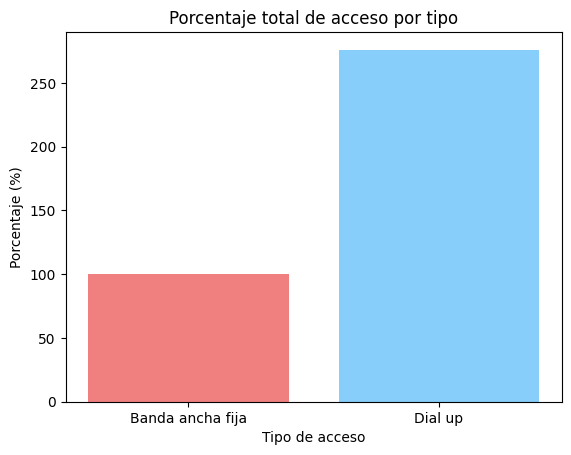

In [ ]:
labels = ['Banda ancha fija', 'Dial up']
values = [porcentajeBA, porcentajeDU]

# Crea el gráfico de barras
plt.bar(labels, values, color=['lightcoral', 'lightskyblue'])

# Agrega los títulos y las etiquetas a los ejes
plt.title('Porcentaje total de acceso por tipo')
plt.xlabel('Tipo de acceso')
plt.ylabel('Porcentaje (%)')

In [ ]:

df_total_accesos.to_csv("Total_nacional_accesos_Internet_fijo_bandancha_bandangosta.csv", index=False)

## Dataset Extra Internet_BAF (Banda ancha fija	Dial up)

In [ ]:
df_baf = pd.read_csv("..\Datasets\Internet_BAF.csv")

In [ ]:
df_baf.head()

,Unnamed: 0,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,0,2022,4,Buenos Aires,4788466,6199.00,4794665
1,1,2022,4,Capital Federal,1549781,2145.00,1551926
2,2,2022,4,Catamarca,70908,1.00,70909
3,3,2022,4,Chaco,143658,5.00,143663
4,4,2022,4,Chubut,167855,904.00,168759


In [ ]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        864 non-null    int64  
 1   Año               864 non-null    int64  
 2   Trimestre         864 non-null    int64  
 3   Provincia         864 non-null    object 
 4   Banda ancha fija  864 non-null    int64  
 5   Dial up           862 non-null    float64
 6   Total             864 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 47.4+ KB


In [ ]:
# veo que tenemos una columna con todos sus valores nulos, procedo a eliminarla
df_baf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Convierte las cadenas a números flotantes.
df_baf['Banda ancha fija'] = df_baf['Banda ancha fija'].astype(float)
df_baf['Dial up'] = df_baf['Dial up'].astype(float)

# Cambio el tipo de dato de la columna "Provincia" a category, importante para clasificar y graficar mas adelante.
df_baf['Provincia'] = df_baf['Provincia'].astype('category')

In [ ]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Año               864 non-null    int64   
 1   Trimestre         864 non-null    int64   
 2   Provincia         864 non-null    category
 3   Banda ancha fija  864 non-null    float64 
 4   Dial up           862 non-null    float64 
 5   Total             864 non-null    int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 35.5 KB


In [ ]:
df_baf.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.00,864.00,864.00,862.00,864.00
mean,2018.00,2.50,348148.46,963.88,349110.10
std,2.58,1.12,747621.90,2397.37,749485.37
min,2014.00,1.00,12193.00,0.00,12557.00
25%,2016.00,1.75,52215.25,9.00,52329.00
50%,2018.00,2.50,104412.00,148.00,104596.50
75%,2020.00,3.25,179156.75,619.00,180174.50
max,2022.00,4.00,4788466.00,15229.00,4794665.00


### Basandonos en la salida del método describe(), vemos algunos puntos clave que podemos destacar:

* los datos abarcan desde 2014 hasta 2022, con un promedio de 2018. Esto indica que la mayoría de los datos se encuentran alrededor de este año.

* En cuanto a la columna "Trimestre", los datos van desde 1 hasta 4, con un promedio de 2.5. Esto sugiere que el segundo y tercer trimestre son los más comunes.

* Para la columna "Banda ancha fija", los datos varían desde 12193 hasta 4788466, con un promedio de 349110. Esto indica una gran variación en los datos y que hay algunos valores extremadamente altos.

* La columna "Dial up" tiene un rango de valores desde 0 hasta 15229, con un promedio de 963.88. Esto sugiere que hay muchos valores cercanos a 0 y que hay algunos valores extremadamente altos.

* Finalmente, para la columna "Total", los datos varían desde 12557 hasta 4794665, con un promedio de 349110. Al igual que con "Banda ancha fija", esto indica una gran variación en los datos y que hay algunos valores extremadamente altos.

In [ ]:
# Calcula el porcentaje BA y DU
total_BAx = df_baf['Banda ancha fija'].sum()
total_DUx = df_baf['Dial up'].sum()
totalx = df_baf['Total'].sum()

# Calcula el porcentaje de 'Banda ancha fija' y 'Dial up'
porcentajeBAx = (total_BAx / totalx) * 100
porcentajeDUx= (total_DUx / totalx) * 100

print("El porcentaje total de Banda ancha fija es: ", round(porcentajeBAx, 2))
print("El porcentaje total de Dial up es: ", round(porcentajeDUx, 2))

El porcentaje total de Banda ancha fija es:  99.72
El porcentaje total de Dial up es:  0.28


Text(0, 0.5, 'Porcentaje (%)')

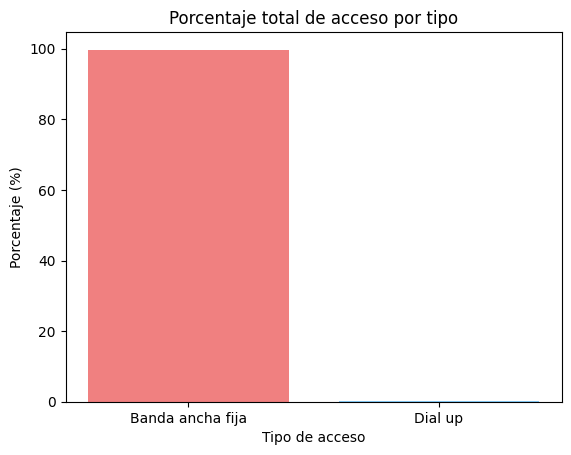

In [ ]:
labels = ['Banda ancha fija', 'Dial up']
values = [porcentajeBAx, porcentajeDUx]

# Crea el gráfico de barras
plt.bar(labels, values, color=['lightcoral', 'lightskyblue'])

# Agrega los títulos y las etiquetas a los ejes
plt.title('Porcentaje total de acceso por tipo')
plt.xlabel('Tipo de acceso')
plt.ylabel('Porcentaje (%)')

### Suma de accesos por banda ancha fija en el año 2022 por provincia

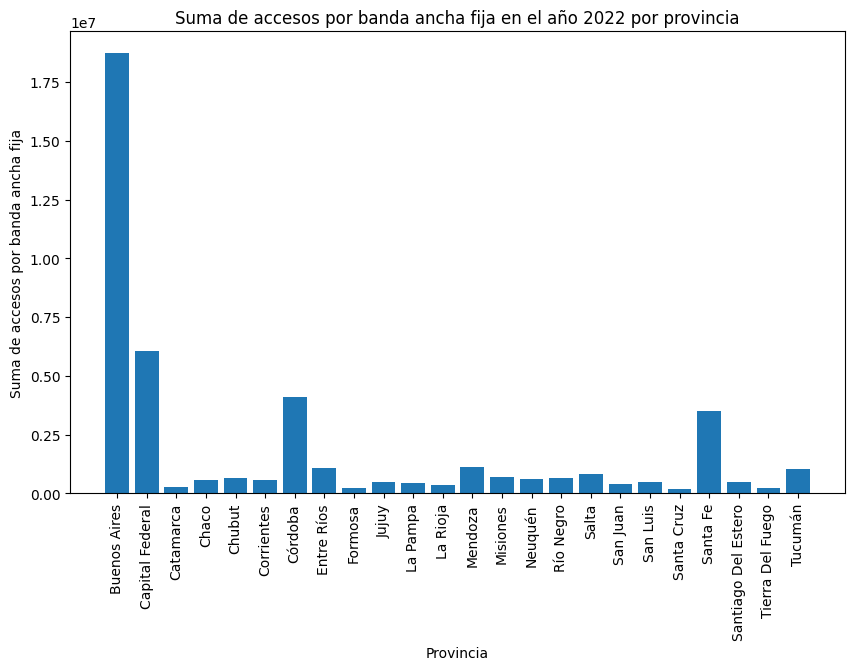

In [ ]:

df_2022 = df_baf[df_baf['Año'] == 2022]

# Suma los accesos por banda ancha fija para cada provincia
sum_data = df_2022.groupby('Provincia')['Banda ancha fija'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico


plt.bar(sum_data.index, sum_data.values) # Crea las barras
plt.xlabel('Provincia') # Etiqueta del eje x
plt.ylabel('Suma de accesos por banda ancha fija') # Etiqueta del eje y
plt.title('Suma de accesos por banda ancha fija en el año 2022 por provincia') # Título del gráfico


plt.xticks(rotation=90)
plt.show() # Muestra el gráfico



* La banda ancha fija es un servicio esencial para muchas actividades en la sociedad moderna, incluyendo el trabajo remoto, la educación a distancia, y el entretenimiento en línea. Por lo tanto, entender dónde y cuántos accesos a banda ancha fija hay en cada provincia puede ayudar a los responsables de la toma de decisiones a planificar e implementar políticas y programas de infraestructura de red.

    la grafica nos ayuda a  identificar las áreas que necesitan más acceso a la banda ancha fija. Por ejemplo, si una provincia tiene un número relativamente bajo de accesos a banda ancha fija, podría ser un indicador de que esa provincia necesita más inversión en infraestructura de red para satisfacer las necesidades de sus habitantes.

### Suma de accesos por Banda ancha fija desde el año 2014 hasta 2022

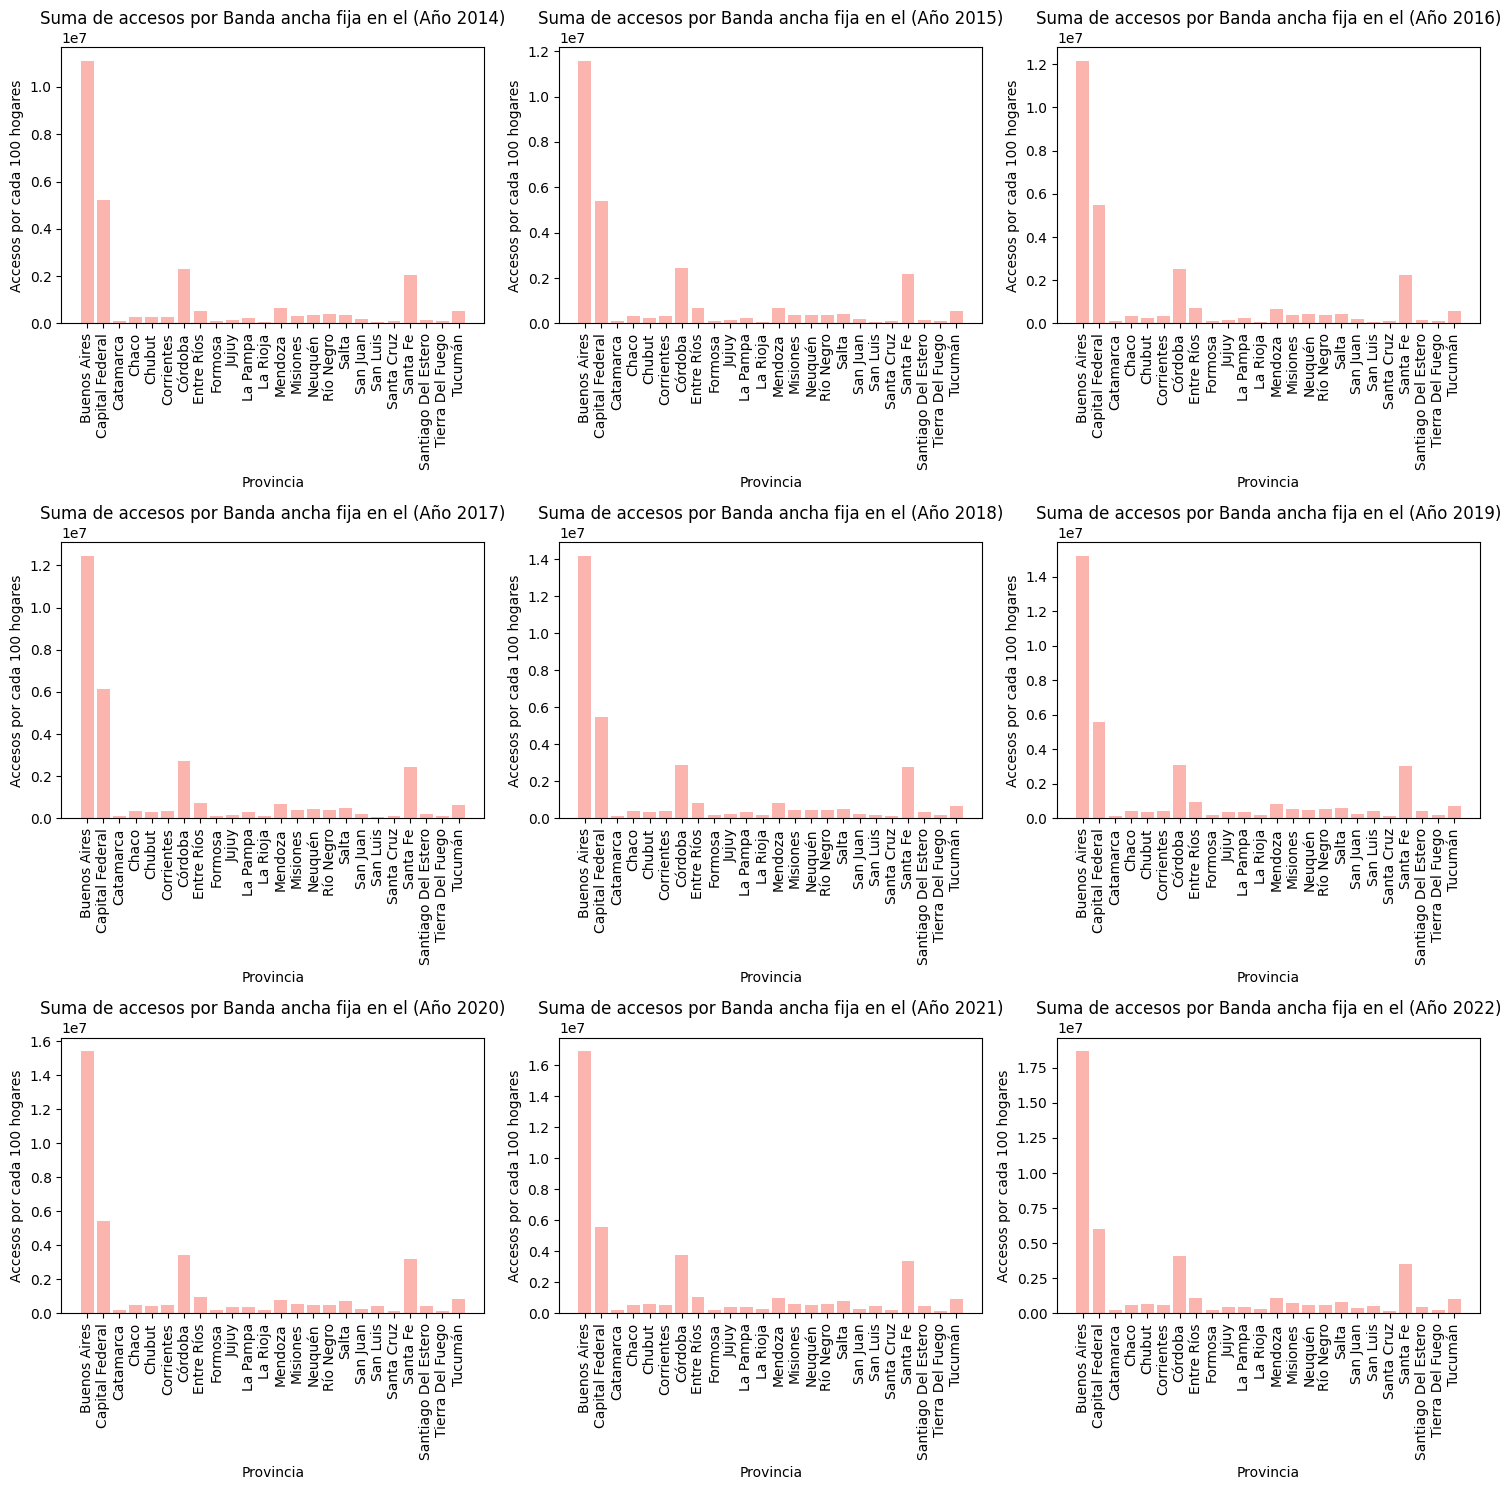

In [ ]:
# Definir el color pastel para las columnas
color_pastel = sns.color_palette("Pastel1")[0]  # Elige el primer color de la paleta

# Crear un subplot para cada año
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterar sobre los años del 2020 al 2022
for año, ax in zip(range(2014, 2023), axes.flatten()):
    # Filtrar los datos para el año actual
    df_año = df_baf[df_baf['Año'] == año]

    # Agrupar los datos por provincia y calcular el promedio de accesos
   
    sum_data = df_año.groupby('Provincia')['Banda ancha fija'].sum()

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(sum_data.index, sum_data.values, color=color_pastel)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Suma de accesos por Banda ancha fija en el (Año {año})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Cambio en los accesos por Banda ancha fija a lo largo de los años

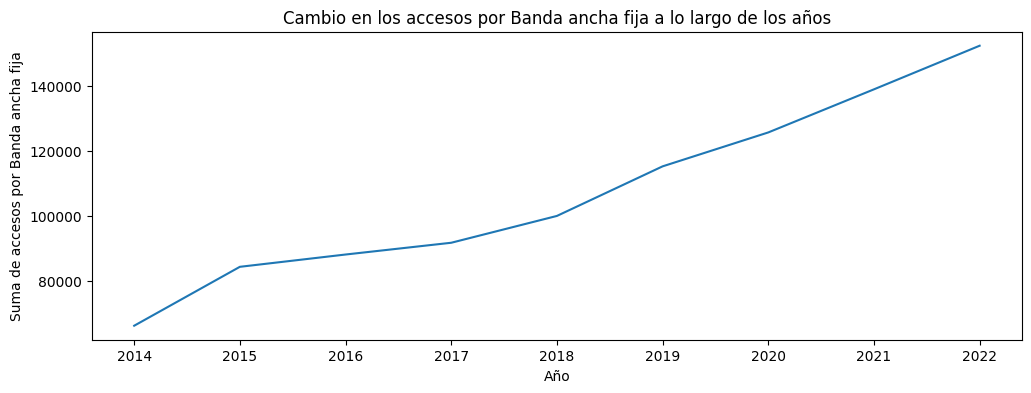

In [ ]:
df_baf = df_baf.sort_values(['Año', 'Trimestre'])

sum_data = df_baf.groupby('Año')['Banda ancha fija'].median()

plt.figure(figsize=(12, 4)) # Define el tamaño del gráfico
plt.plot(sum_data.index, sum_data.values) # Crea la línea de tiempo
plt.xlabel('Año') # Etiqueta del eje x
plt.ylabel('Suma de accesos por Banda ancha fija') # Etiqueta del eje y
plt.title('Cambio en los accesos por Banda ancha fija a lo largo de los años') # Título del gráfico
plt.show() # Muestra el gráfico

#### El crecimiento en los accesos por banda ancha fija a lo largo de los años puede indicar una serie de tendencias y factores.

* Mayor adopción de Internet: Este crecimiento podría indicar que más personas están adoptando el uso de Internet. Esto podría ser el resultado de una mayor disponibilidad de servicios de Internet, una mayor asequibilidad o un mayor reconocimiento de los beneficios de estar en línea globaldata.com.

* Transición de tecnologías de Internet más antiguas: El aumento de los accesos por banda ancha fija también podría indicar que las personas están cambiando de tecnologías de Internet más antiguas, como Dial-up, a la banda ancha fija. Esto podría ser debido a la mayor velocidad y fiabilidad de la banda ancha fija telecomtv.com.

* Inversiones en infraestructura de Internet: Este crecimiento también podría ser el resultado de inversiones en infraestructura de Internet que han aumentado la disponibilidad de la banda ancha fija. Esto podría incluir la construcción de nuevas líneas de banda ancha fija o la mejora de las existentes mckinsey.com.

* Cambios en el comportamiento de los usuarios: También podríamos considerar que el crecimiento en los accesos por banda ancha fija es un reflejo de cambios en el comportamiento de los usuarios. Por ejemplo, el aumento del trabajo remoto, el streaming de video y los juegos en línea podrían haber impulsado una mayor demanda de conexiones de Internet de alta velocidad globaldata.com.

    En resumen, el crecimiento de los accesos por banda ancha fija a lo largo de los años es una señal positiva de que más personas están obteniendo acceso a Internet de alta velocidad. Esto es beneficioso tanto para los individuos, que pueden acceder a una gama más amplia de servicios en línea, como para la economía en general, ya que un mayor acceso a Internet puede impulsar la innovación y el crecimiento económico.

### Suma de accesos por Dial up en el año 2022 por provincia

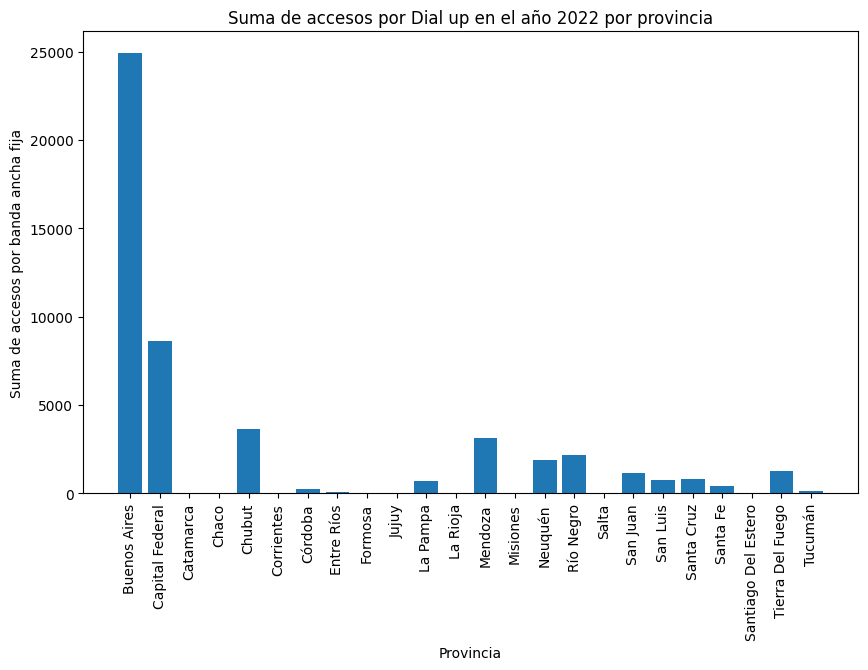

In [ ]:
df_2022 = df_baf[df_baf['Año'] == 2022]

# Suma los accesos por banda ancha fija para cada provincia
sum_data = df_2022.groupby('Provincia')['Dial up'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico
plt.bar(sum_data.index, sum_data.values) # Crea las barras
plt.xlabel('Provincia') # Etiqueta del eje x
plt.ylabel('Suma de accesos por banda ancha fija') # Etiqueta del eje y
plt.title('Suma de accesos por Dial up en el año 2022 por provincia') # Título del gráfico

plt.xticks(rotation=90)
plt.show() # Muestra el gráfico



#### Con respecto al grafico de accesos por Dial up podemos llegar a tres cosas:

* Áreas rurales o remotas: vemos que hay un número significativo de accesos por Dial-up en ciertas provincias, podría ser que estas provincias sean áreas rurales o remotas donde el acceso a Internet de banda ancha no está disponible o es demasiado costoso.

* Disminución del uso de Dial-up: Si el número de accesos por Dial-up ha estado disminuyendo con el tiempo, esto podría reflejar la tendencia general de que cada vez más personas están cambiando al acceso a Internet de banda ancha.

* Variaciones entre provincias: grandes variaciones en el número de accesos por Dial-up entre diferentes provincias, esto podría indicar diferencias en la disponibilidad de acceso a Internet de banda ancha entre estas provincias.

    En resumen, aunque el acceso a Internet por Dial-up es una tecnología antigua que ha sido reemplazada en gran medida por el acceso a Internet de banda ancha, todavía puede ser relevante en algunas áreas, especialmente en áreas rurales o remotas. Por lo tanto, es importante considerar este factor al analizar los datos de tu gráfico.

### Suma de accesos por Dial up desde el año 2014 hasta 2022

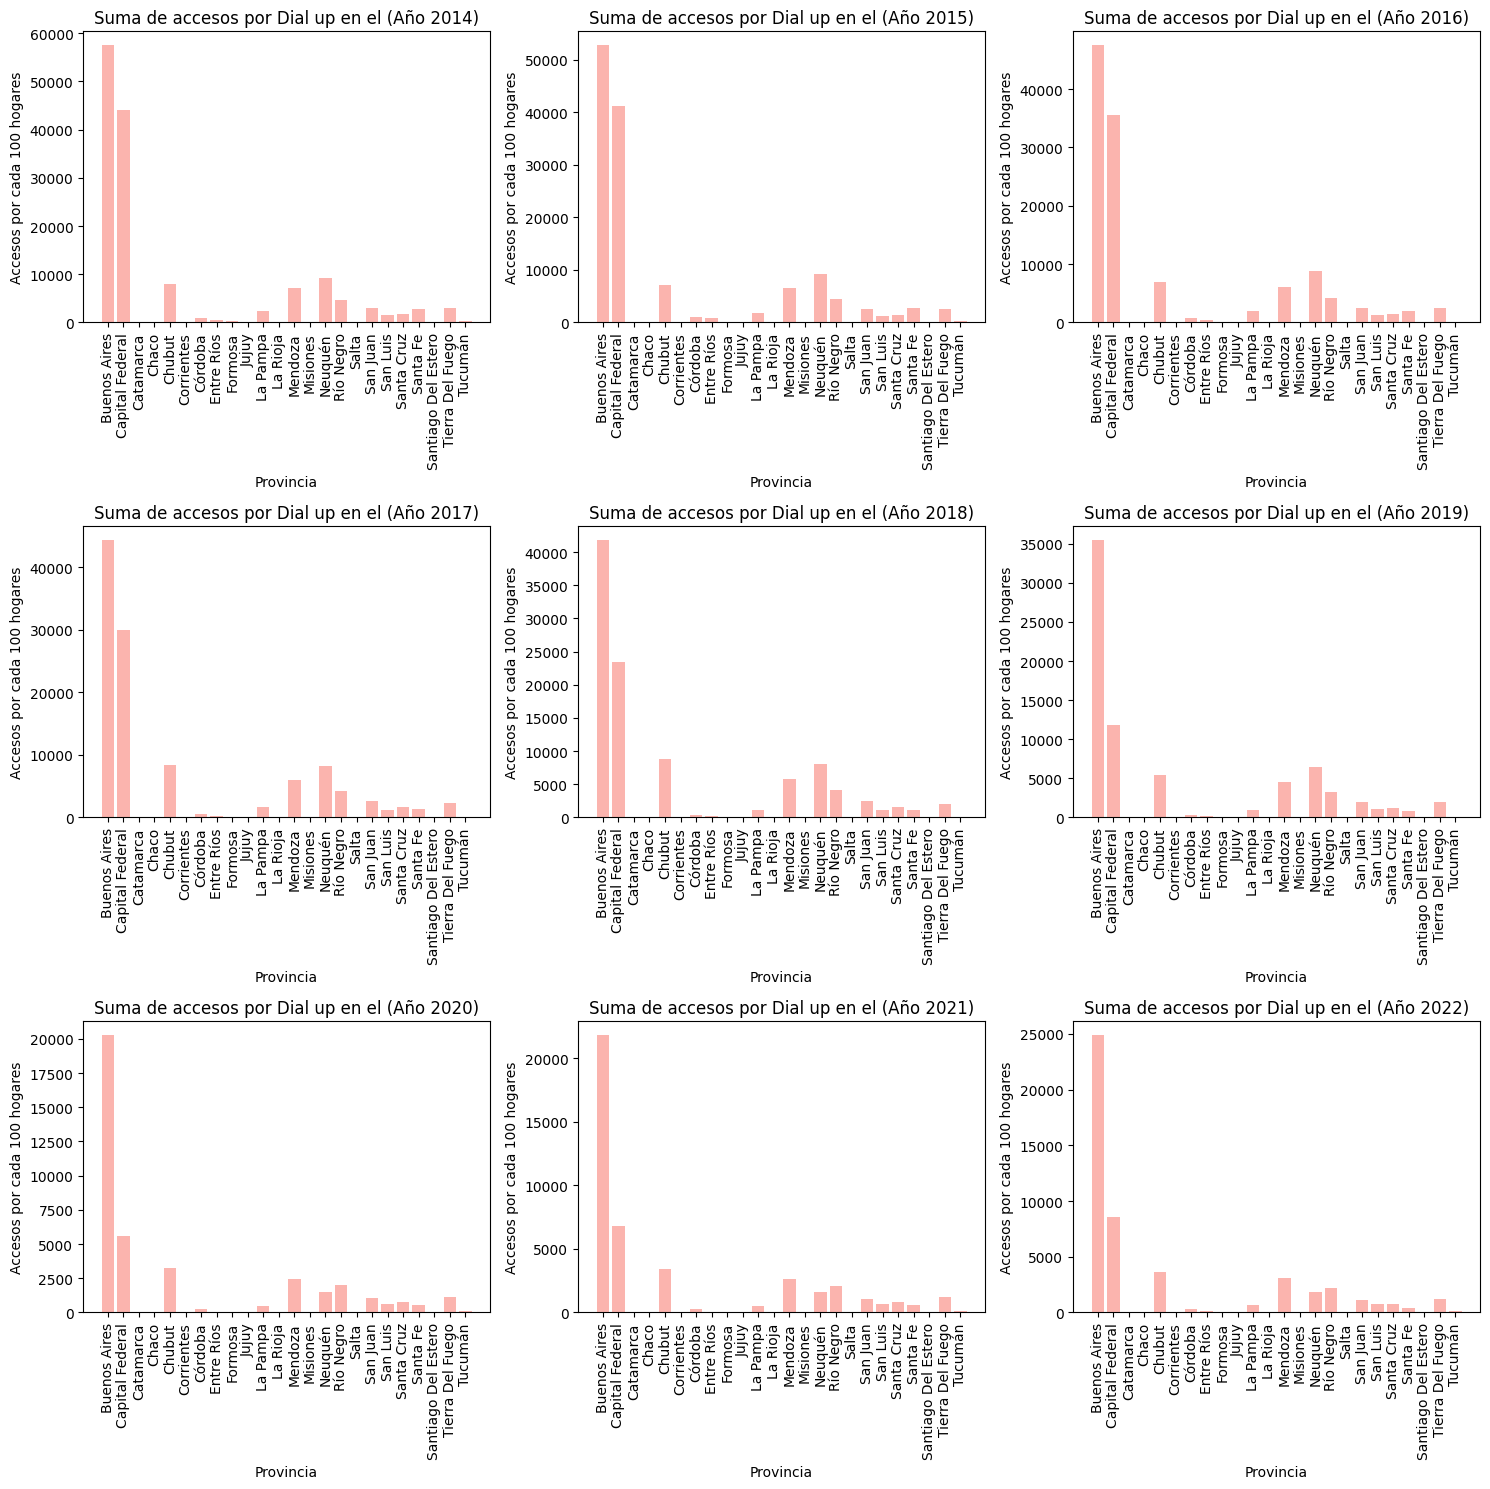

In [ ]:
# Definir el color pastel para las columnas
color_pastel = sns.color_palette("Pastel1")[0]  # Elige el primer color de la paleta

# Crear un subplot para cada año
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterar sobre los años del 2020 al 2022
for año, ax in zip(range(2014, 2023), axes.flatten()):
    # Filtrar los datos para el año actual
    df_año = df_baf[df_baf['Año'] == año]

    # Agrupar los datos por provincia y calcular el promedio de accesos
   
    sum_data = df_año.groupby('Provincia')['Dial up'].sum()

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(sum_data.index, sum_data.values, color=color_pastel)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Suma de accesos por Dial up en el (Año {año})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Cambio en los accesos por Dial up a lo largo de los años

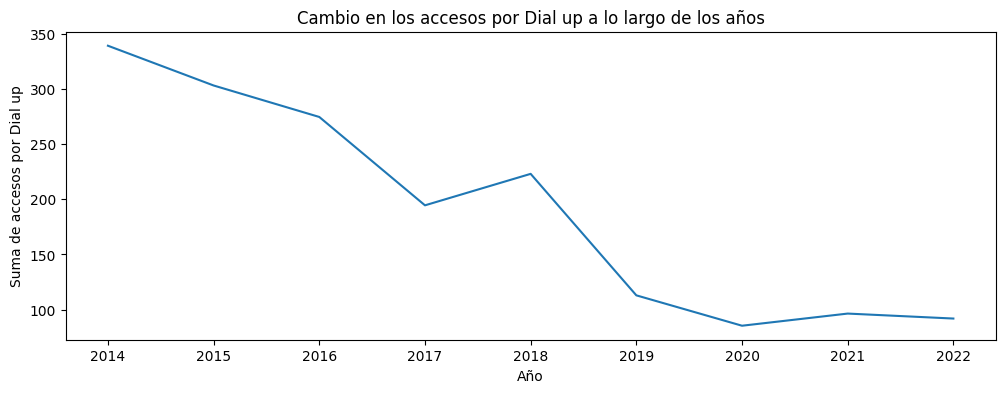

In [ ]:
df_baf = df_baf.sort_values(['Año', 'Trimestre'])

sum_data = df_baf.groupby('Año')['Dial up'].median()

plt.figure(figsize=(12, 4)) # Define el tamaño del gráfico
plt.plot(sum_data.index, sum_data.values) # Crea la línea de tiempo
plt.xlabel('Año') # Etiqueta del eje x
plt.ylabel('Suma de accesos por Dial up') # Etiqueta del eje y
plt.title('Cambio en los accesos por Dial up a lo largo de los años') # Título del gráfico
plt.show() # Muestra el gráfico


#### El decrecimiento en los accesos por Dial-up a lo largo de los años puede indicar varias tendencias y factores:

* Transición a la Banda Ancha: Este decrecimiento podría indicar que las personas están cambiando de la tecnología de Dial-up, que es más antigua y más lenta, a conexiones de banda ancha, que son más rápidas y más fiables.

* Mejora de la Infraestructura de Internet: El decrecimiento también podría ser el resultado de mejoras en la infraestructura de Internet que han hecho que la banda ancha sea más accesible. Esto podría incluir la construcción de nuevas líneas de banda ancha o la mejora de las existentes.

* Cambios en el Comportamiento de los Usuarios: El decrecimiento en los accesos por Dial-up también podría reflejar cambios en el comportamiento de los usuarios. Por ejemplo, el aumento del streaming de video y los juegos en línea podrían haber impulsado una mayor demanda de conexiones de Internet de alta velocidad.

* Accesibilidad y Costo: A pesar de su decrecimiento, el Dial-up todavía puede ser relevante en algunas áreas, especialmente en áreas rurales o remotas donde el acceso a Internet de banda ancha no está disponible o es demasiado costoso.

    En resumen, el decrecimiento de los accesos por Dial-up a lo largo de los años es una señal de que las tecnologías de Internet más rápidas y más fiables están reemplazando a las más antiguas y más lentas. Sin embargo, el Dial-up todavía puede ser relevante en algunas áreas, por lo que es importante tener en cuenta este factor al analizar estos datos.

In [ ]:

df_baf.to_csv("Banda_ancha_fija_Dial_up.csv", index=False)

# Acceso a Internet fijo por tecnología y provincia

In [ ]:
# Especifica las columnas que quieres leer como strings
dtype_dict = {'ADSL': str, 'Cablemodem': str, 'Fibra óptica': str, 'Wireless': str, 'Otros': str, 'Total': str}

# Lee el archivo .xlsx
df_iapt = pd.read_excel("..\Datasets_extras\Internet_Accesos-por-tecnologia.xlsx", dtype=dtype_dict)

reemplazo las " , " por  " . " para poder trabajar con los valores

In [ ]:
df_iapt['ADSL'] = df_iapt['ADSL'].str.replace(',', '.')
df_iapt['Cablemodem'] = df_iapt['Cablemodem'].str.replace(',', '.')
df_iapt['Fibra óptica'] = df_iapt['Fibra óptica'].str.replace(',', '.')
df_iapt['Wireless'] = df_iapt['Wireless'].str.replace(',', '.')
df_iapt['Otros'] = df_iapt['Otros'].str.replace(',', '.')
df_iapt['Total'] = df_iapt['Total'].str.replace(',', '.')



cambio a tipo flotante las columnas de interes para poder hacer calculos

In [ ]:
df_iapt['ADSL'] = df_iapt['ADSL'].astype(float)
df_iapt['Cablemodem'] = df_iapt['Cablemodem'].astype(float)
df_iapt['Fibra óptica'] = df_iapt['Fibra óptica'].astype(float)
df_iapt['Wireless'] = df_iapt['Wireless'].astype(float)
df_iapt['Otros'] = df_iapt['Otros'].astype(float)
df_iapt['Total'] = df_iapt['Total'].astype(float)

In [ ]:
df_iapt.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373.00,6037457.00,3060575.00,572969.00,221740.00,11208114.00,Oct-Dic 2022
1,2022,3,1395277.00,6031970.00,2871541.00,557110.00,235230.00,11091128.00,Jul-Sept 2022
2,2022,2,1468333.00,5979214.00,2723285.00,556243.00,231609.00,10958684.00,Abr-Jun 2022
3,2022,1,1533240.00,6073426.00,2219533.00,545814.00,251996.00,10624009.00,Ene-Mar 2022
4,2021,4,1657615.00,5984240.00,2072236.00,523107.00,252596.00,10489794.00,Oct-Dic 2021


In [ ]:
df_iapt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           36 non-null     int64  
 1   Trimestre     36 non-null     int64  
 2   ADSL          36 non-null     float64
 3   Cablemodem    36 non-null     float64
 4   Fibra óptica  36 non-null     float64
 5   Wireless      36 non-null     float64
 6   Otros         36 non-null     float64
 7   Total         36 non-null     float64
 8   Periodo       36 non-null     object 
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


## Comportamiento conexiones por tecnología

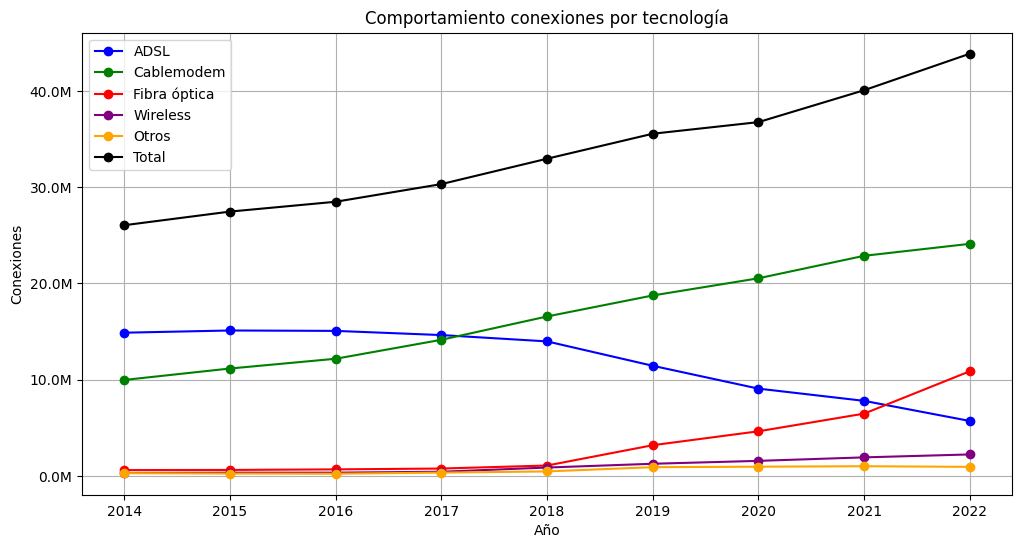

In [ ]:

# Agrupa y suma los datos por año para diferentes tecnologías
tecnologias = df_iapt.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total']].sum()

# Configura el gráfico
plt.figure(figsize=(12, 6))

colores = {'ADSL': 'blue', 'Cablemodem': 'green', 'Fibra óptica': 'red', 'Wireless': 'purple', 'Otros': 'orange', 'Total': 'black'}
# Itera sobre las columnas de velocidad
for columna in tecnologias.columns:
    plt.plot(tecnologias.index, tecnologias[columna], marker='o', label=columna, color=colores[columna])

plt.xlabel('Año')
plt.ylabel('Conexiones')
plt.title('Comportamiento conexiones por tecnología')
plt.legend()
plt.grid(True)

# Formatea el eje
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Muestra el gráfico
plt.show()



* Crecimiento de Fibra óptica: La columna 'Fibra óptica' muestra un crecimiento constante a lo largo de los años, lo que indica que el número de conexiones a Internet de fibra óptica ha estado aumentando. Esto es consistente con las tendencias generales de migración de ADSL a fibra óptica, ya que la fibra óptica ofrece velocidades de conexión más rápidas y mayor confiabilidad.

* Declive de ADSL: La columna 'ADSL' muestra un declive constante a lo largo de los años, lo que indica que el número de conexiones a Internet por ADSL ha estado disminuyendo. Esto también es consistente con las tendencias generales de migración de ADSL a fibra óptica.

* Crecimiento de Cablemodem y Wireless: Las columnas 'Cablemodem' y 'Wireless' también muestran un crecimiento constante a lo largo de los años, lo que indica que el número de conexiones a Internet por cable y sin cable ha estado aumentando.

* Incremento en el Total: La columna 'Total' muestra un incremento constante a lo largo de los años, lo que indica que el número total de conexiones a Internet ha estado aumentando.

* Crecimiento desigual entre tecnologías: Es interesante notar que aunque el 'Total' ha estado aumentando, no todas las tecnologías han crecido a la misma velocidad. Por ejemplo, la columna 'Fibra óptica' ha crecido mucho más rápido que la columna 'ADSL'. Esto podría indicar que diferentes tecnologías están siendo adoptadas a diferentes velocidades en diferentes regiones o por diferentes grupos de usuarios.

## Crecimiento Porcentual Año a Año de las Tecnologías

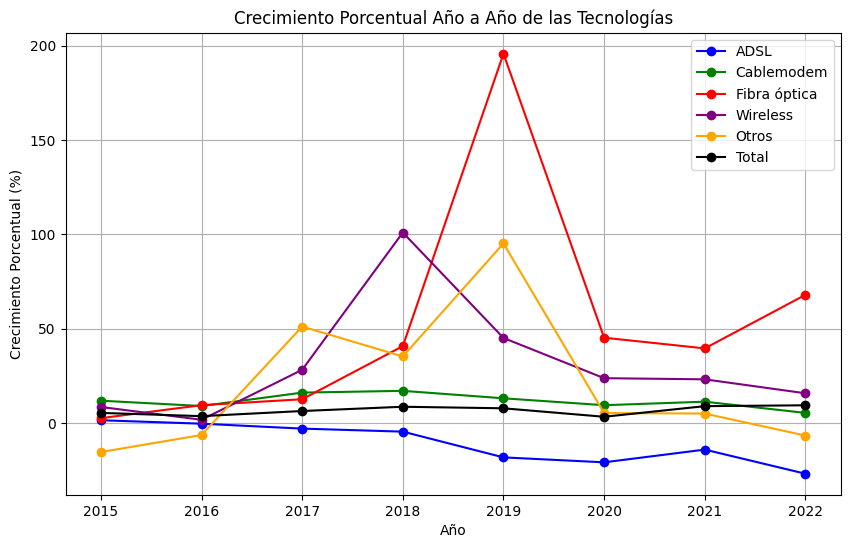

In [ ]:
# Calcular el crecimiento porcentual año a año
crecimiento = tecnologias.pct_change() * 100

# Configurar el gráfico
plt.figure(figsize=(10, 6))

colores = {'ADSL': 'blue', 'Cablemodem': 'green', 'Fibra óptica': 'red', 'Wireless': 'purple', 'Otros': 'orange', 'Total': 'black'}

# Iterar sobre las columnas de crecimiento y graficar
for columna in crecimiento.columns:
    plt.plot(crecimiento.index, crecimiento[columna], marker='o', label=columna,  color=colores[columna])

plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual (%)')
plt.title('Crecimiento Porcentual Año a Año de las Tecnologías')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

* Crecimiento de Fibra óptica: La columna 'Fibra óptica' muestra un crecimiento constante a lo largo de los años, lo que indica que el número de conexiones a Internet de fibra óptica ha estado aumentando a un ritmo constante.
En particular, entre 2018 y 2019, la fibra óptica creció cerca de un 200%, mientras que las tecnologías que ofrecen velocidades más bajas cayeron. Esto podría indicar que la fibra óptica está ganando popularidad en este período de tiempo debido a su mayor velocidad y fiabilidad.

* Declivo de ADSL: La columna 'ADSL' muestra un declive constante a lo largo de los años, lo que indica que el número de conexiones a Internet por ADSL ha estado disminuyendo a un ritmo constante.

* Disminución de cablemodem y fibra óptica: entre 2021 y 2022 hubo una disminución del 30% aproximadamente en las conexiones por cablemodem y un crecimiento similar en las conexiones de fibra óptica. Esto podría indicar que las personas están cambiando de cablemodem a fibra óptica.

* Crecimiento desigual entre tecnologías: no todas las tecnologías han crecido a la misma velocidad. Por ejemplo, la columna 'Fibra óptica' ha crecido mucho más rápido que la columna 'ADSL'. Esto podría indicar que diferentes tecnologías están siendo adoptadas a diferentes velocidades en diferentes regiones o por diferentes grupos de usuarios.

### colores

In [ ]:
censohogares = pd.read_csv('..\Datasets_extras\censohogares2022.csv', sep=';')
censohogares.head()

,Provincia,Total de viviendas particulares,Total de población
0,Capital Federal,1.638.764,3.120.612
1,Buenos Aires,6.695.273,17.569.053
2,Catamarca,158.989,429.556
3,Chaco,401.658,1.142.963
4,Chubut,236.010,603.120


In [ ]:
#censohogares[['Total de viviendas particulares', 'Total de población']] = censohogares[['Total de viviendas particulares', 'Total de población']].apply(pd.to_numeric, errors='coerce')
censohogares[['Total de viviendas particulares', 'Total de población']] = censohogares[['Total de viviendas particulares', 'Total de población']].replace('\.', '', regex=True)

In [ ]:
censohogares.head()

,Provincia,Total de viviendas particulares,Total de población
0,Capital Federal,1638764,3120612
1,Buenos Aires,6695273,17569053
2,Catamarca,158989,429556
3,Chaco,401658,1142963
4,Chubut,236010,603120


In [ ]:
agrupacion = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
agrupacion = agrupacion.reset_index()
agrupacion.head()

,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,63.98
1,Capital Federal,113.64
2,Catamarca,36.74
3,Chaco,33.47
4,Chubut,53.11


In [ ]:
censohogares['Total de viviendas particulares'] = pd.to_numeric(censohogares['Total de viviendas particulares'])
censohogares['Total de población'] = pd.to_numeric(censohogares['Total de población'])

In [ ]:
merged_df = agrupacion.merge(censohogares, on='Provincia')
#df = pd.merge(sum2022, hogares, on='Provincia')

In [ ]:
merged_df.head()

,Provincia,Accesos por cada 100 hogares,Total de viviendas particulares,Total de población
0,Buenos Aires,63.98,6695273,17569053
1,Capital Federal,113.64,1638764,3120612
2,Catamarca,36.74,158989,429556
3,Chaco,33.47,401658,1142963
4,Chubut,53.11,236010,603120


In [ ]:
merged_df['Accesos por cada 100 hogares'] = merged_df['Accesos por cada 100 hogares'] / 100

In [ ]:
# Crear 'Viviendas con internet'
merged_df['Viviendas con internet'] = merged_df['Total de viviendas particulares'] * merged_df['Accesos por cada 100 hogares']

# Crear 'Viviendas sin internet'
merged_df['Viviendas sin internet'] = merged_df['Total de viviendas particulares'] - merged_df['Viviendas con internet']

# Crear '% viviendas sin internet'
merged_df['% viviendas sin internet'] =merged_df['Viviendas sin internet'] / merged_df['Total de viviendas particulares']

In [ ]:
merged_df.head()

,Provincia,Accesos por cada 100 hogares,Total de viviendas particulares,Total de población,Viviendas con internet,Viviendas sin internet,% viviendas sin internet
0,Buenos Aires,0.64,6695273,17569053,4283598.47,2411674.53,0.36
1,Capital Federal,1.14,1638764,3120612,1862277.75,-223513.75,-0.14
2,Catamarca,0.37,158989,429556,58408.58,100580.42,0.63
3,Chaco,0.33,401658,1142963,134446.09,267211.91,0.67
4,Chubut,0.53,236010,603120,125355.40,110654.60,0.47


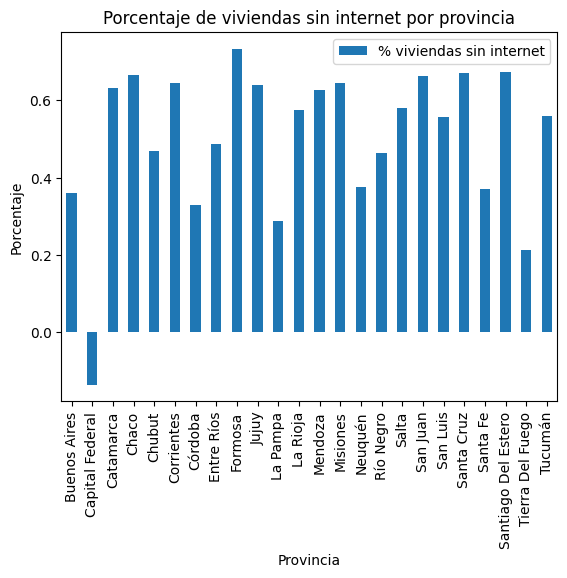

In [ ]:
merged_df.plot(kind='bar', x='Provincia', y='% viviendas sin internet', title='Porcentaje de viviendas sin internet por provincia')
plt.ylabel('Porcentaje')
plt.show()

In [ ]:
merged_df.to_csv("censohogares2022.csv", index=False)